In [3]:
import os
import sys
from sklearn.cluster import KMeans
import seaborn  as sns

import glob
from sklearn.decomposition import PCA
import PIL.ImageStat as stat
from PIL import Image
import re 

from skimage import color, viewer, exposure, img_as_float, data

sys.path.append(os.path.abspath("clustering/"))
from EM import *

from sklearn_extensions.fuzzy_kmeans import KMedians, FuzzyKMeans

import pandas as pd
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

from kernels import *
from sklearn import datasets

### Algoritmo EM

Converge in iterations 32


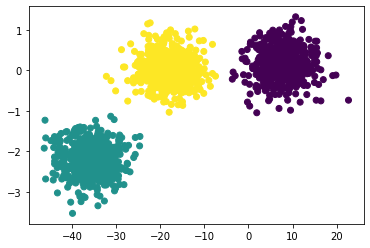

In [85]:
np.random.seed(199708)
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[4, 0], [0, 0.4]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

k = 3
weight = 0
mu = 0
sigma = 0

t = 0
t_max = 100
epsilon = 0.005
verosimilitud = 0
mu, sigma, weight, verosimilitud = EM_algoritmo(X_aniso, mu, sigma, weight, t, t_max, epsilon, k, verosimilitud)

pi_em = classification(X_aniso, mu, sigma, weight)


Converge in iterations 10


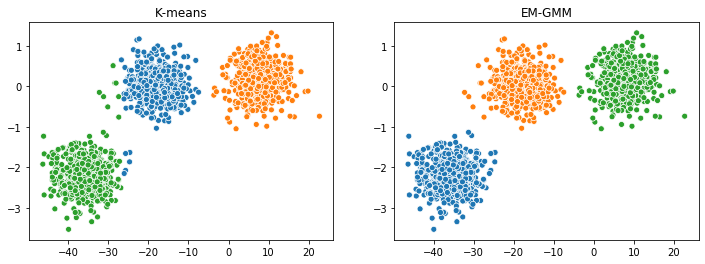

In [90]:
k=3
np.random.seed(199708)

fuzzy_kmeans = KMeans(n_clusters=k)
fuzzy_kmeans.fit(X_aniso)
y_fuzz = fuzzy_kmeans.labels_

mu, sigma, weight, verosimilitud = EM_algoritmo(X_aniso, mu, sigma, weight, t, t_max, 
                                                epsilon, k, verosimilitud)

pi_em = classification(X_aniso, mu, sigma, weight)


fig, axs = plt.subplots(ncols=2, figsize=(12,4))
sns.scatterplot(ax=axs[0], x=X_aniso.T[0], y=X_aniso.T[1], hue=y_fuzz, palette="tab10",
                legend=False)
axs[0].set(title="K-means")
sns.scatterplot(ax=axs[1], x=X_aniso.T[0], y=X_aniso.T[1], hue=pi_em, palette="tab10",
                legend=False)
axs[1].set(title="EM-GMM")

plt.show()

### Kernel K-means 

In [3]:
from kernels import * # functions


In [4]:
np.random.seed(199708)
k = 2
n_samples = 1500
noisy_circles, y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons, y = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs, y = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure, y = np.random.rand(n_samples, 2), None

pi_0 = np.random.randint(0, k, n_samples)  # initialize the clusters

##### no structure

Converge in iterations 100
Converge in iterations 8


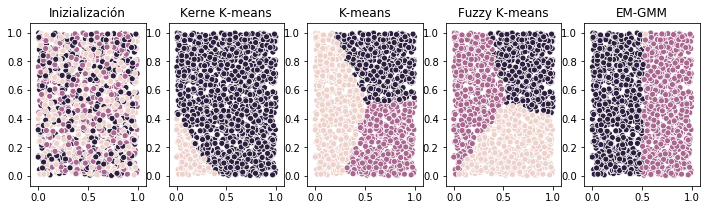

In [5]:
k=3
pi_0 = np.random.randint(0, k, n_samples)  # initialize the clusters
K_matrix= polynomial_kenerl(no_structure, 10/3, 2)
pi_ajust = kernel_kmeans(no_structure, K_matrix, k, 0, 100, pi_0)

kmeans = KMeans(n_clusters=k)
y = kmeans.fit_predict(no_structure)

fuzzy_kmeans = FuzzyKMeans(k=k, m=2)
fuzzy_kmeans.fit(no_structure)
y_fuzz = fuzzy_kmeans.labels_

mu, sigma, weight, verosimilitud = EM_algoritmo(no_structure, mu, sigma, weight, t, 
                                                t_max, epsilon, k, verosimilitud)
pi_em = classification(no_structure, mu, sigma, weight)

fig, axs = plt.subplots(ncols=5, figsize=(12,3))
sns.scatterplot(ax=axs[0], x=no_structure.T[0], y=no_structure.T[1], hue=pi_0,
               legend=False)
axs[0].set(title="Inizialización")
sns.scatterplot(ax=axs[1], x=no_structure.T[0], y=no_structure.T[1], hue=pi_ajust,
               legend=False)
axs[1].set(title="Kerne K-means")
sns.scatterplot(ax=axs[2], x=no_structure[:,0], y=no_structure[:,1], hue=y,
               legend=False)
axs[2].set(title="K-means")
sns.scatterplot(ax=axs[3], x=no_structure.T[0], y=no_structure.T[1], hue=y_fuzz, 
                legend=False)
axs[3].set(title="Fuzzy K-means")
sns.scatterplot(ax=axs[4], x=no_structure.T[0], y=no_structure.T[1], hue=pi_em, 
                legend=False)
axs[4].set(title="EM-GMM")

plt.show()

##### circle

Converge in iterations 4
Converge in iterations 9


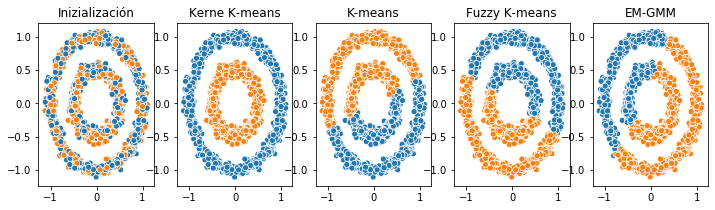

In [6]:
k = 2
np.random.seed(199708)
pi_0 = np.random.randint(0, k, n_samples)  # initialize the clusters

K_matrix = polynomial_kenerl(noisy_circles, 0.6, 2)
pi_ajust = kernel_kmeans(noisy_circles, K_matrix, k, 0, 100, pi_0)

kmeans = KMeans(n_clusters=k)
y = kmeans.fit_predict(noisy_circles)

fuzzy_kmeans = FuzzyKMeans(k=k, m=2)
fuzzy_kmeans.fit(noisy_circles)
y_fuzz = fuzzy_kmeans.labels_

mu, sigma, weight, verosimilitud = EM_algoritmo(noisy_circles, mu, sigma, weight, t, t_max, epsilon, k, verosimilitud)
pi_em = classification(noisy_circles, mu, sigma, weight)

fig, axs = plt.subplots(ncols=5, figsize=(12,3))
sns.scatterplot(ax=axs[0], x=noisy_circles.T[0], y=noisy_circles.T[1], hue=pi_0,
               legend=False)
axs[0].set(title="Inizialización")
sns.scatterplot(ax=axs[1], x=noisy_circles.T[0], y=noisy_circles.T[1], hue=pi_ajust,
               legend=False)
axs[1].set(title="Kerne K-means")
sns.scatterplot(ax=axs[2], x=noisy_circles[:,0], y=noisy_circles[:,1], hue=y,
               legend=False)
axs[2].set(title="K-means")
sns.scatterplot(ax=axs[3], x=noisy_circles.T[0], y=noisy_circles.T[1], hue=y_fuzz, 
                legend=False)
axs[3].set(title="Fuzzy K-means")

sns.scatterplot(ax=axs[4], x=noisy_circles.T[0], y=noisy_circles.T[1], hue=pi_em, 
                legend=False)
axs[4].set(title="EM-GMM")

plt.show()


##### blobs

Converge in iterations 5
Converge in iterations 19


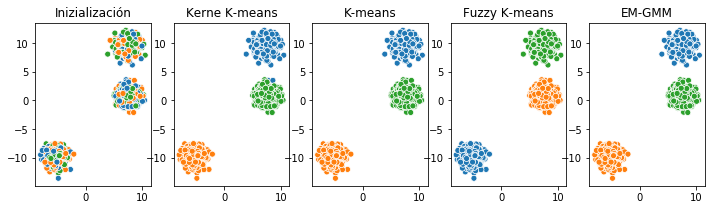

In [28]:
np.random.seed(199708)
k = 3
pi_0 = np.random.randint(0, k, n_samples)  # initialize the clusters
K_matrix = polynomial_kenerl(blobs, 1, 3)
pi_ajust = kernel_kmeans(blobs, K_matrix, k, 0, 100, pi_0)

kmeans = KMeans(n_clusters=k)
y = kmeans.fit_predict(blobs)

fuzzy_kmeans = FuzzyKMeans(k=k, m=2)
fuzzy_kmeans.fit(blobs)
y_fuzz = fuzzy_kmeans.labels_

t=0
k=3
mu, sigma, weight, verosimilitud = EM_algoritmo(blobs, mu, sigma, weight, t, t_max, epsilon, k, verosimilitud)
pi_em = classification(blobs, mu, sigma, weight)

fig, axs = plt.subplots(ncols=5, figsize=(12,3))
sns.scatterplot(ax=axs[0], x=blobs.T[0], y=blobs.T[1], hue=pi_0, palette="tab10",
               legend=False)
axs[0].set(title="Inizialización")
sns.scatterplot(ax=axs[1], x=blobs.T[0], y=blobs.T[1], hue=pi_ajust, palette="tab10",
               legend=False)
axs[1].set(title="Kerne K-means")
sns.scatterplot(ax=axs[2], x=blobs[:,0], y=blobs[:,1], hue=y, palette="tab10",
               legend=False)
axs[2].set(title="K-means")
sns.scatterplot(ax=axs[3], x=blobs.T[0], y=blobs.T[1], hue=y_fuzz, palette="tab10",
                legend=False)
axs[3].set(title="Fuzzy K-means")
sns.scatterplot(ax=axs[4], x=blobs.T[0], y=blobs.T[1], hue=y, palette="tab10", 
                legend=False)
axs[4].set(title="EM-GMM")

plt.show()

##### Noisy Moons

Converge in iterations 5
Converge in iterations 10


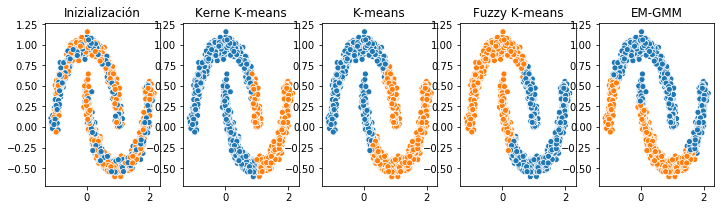

In [8]:
np.random.seed(19970808)
k = 2
pi_0 = np.random.randint(0, k, n_samples)  # initialize the clusters
K_matrix = polynomial_kenerl(noisy_moons, 0.5, 3)
#K_matrix = guassian_kernel(noisy_moons, alpha)
pi_ajust = kernel_kmeans(noisy_moons, K_matrix, k, 0, 100, pi_0)

kmeans = KMeans(n_clusters=k)
y = kmeans.fit_predict(noisy_moons)

fuzzy_kmeans = FuzzyKMeans(k=k, m=2)
fuzzy_kmeans.fit(noisy_moons)
y_fuzz = fuzzy_kmeans.labels_

t=0
k=2
mu, sigma, weight, verosimilitud = EM_algoritmo(noisy_moons, mu, sigma, weight, t, t_max, epsilon, k, verosimilitud)
pi_em = classification(noisy_moons, mu, sigma, weight)

fig, axs = plt.subplots(ncols=5, figsize=(12,3))
sns.scatterplot(ax=axs[0], x=noisy_moons.T[0], y=noisy_moons.T[1], hue=pi_0, palette="tab10",
               legend=False)
axs[0].set(title="Inizialización")
sns.scatterplot(ax=axs[1], x=noisy_moons.T[0], y=noisy_moons.T[1], hue=pi_ajust, palette="tab10",
               legend=False)
axs[1].set(title="Kerne K-means")
sns.scatterplot(ax=axs[2], x=noisy_moons[:,0], y=noisy_moons[:,1], hue=y, palette="tab10",
               legend=False)
axs[2].set(title="K-means")
sns.scatterplot(ax=axs[3], x=noisy_moons.T[0], y=noisy_moons.T[1], hue=y_fuzz, palette="tab10",
                legend=False)
axs[3].set(title="Fuzzy K-means")
sns.scatterplot(ax=axs[4], x=noisy_moons.T[0], y=noisy_moons.T[1], hue=pi_em, 
                legend=False)
axs[4].set(title="EM-GMM")

plt.show()

## Fruits

In [55]:
path_fruits = glob.glob("data_fruits_tarea/*.jpg")

median_fruits = np.zeros([1300, 3])
for i in range(len(path_fruits)):
    im = Image.open(path_fruits[i])
    s = stat.Stat(im)
    median_fruits[i] = s.median
    
name_fruits = [string[string.find("/")+1:string.find("_", string.find("/"))] for string in path_fruits]
apple = [i.startswith("Apple")==False for i in name_fruits]
name_fruits = pd.DataFrame({"path":path_fruits,"name":name_fruits, "apple":apple}) 
name_fruits["name_new"] = name_fruits[["path", "apple", "name"]].apply(lambda x: x[2] if x[1] else x[0][x[0].find("/")+1:x[0].find("_", x[0].find("/")+7)], axis=1)


In [56]:
df = pd.DataFrame({"red":median_fruits[:,0],
                 "blue":median_fruits[:,1],
                 "gren":median_fruits[:,2],
                  "fruit":name_fruits})

ValueError: Shape of passed values is (4, 4), indices imply (1300, 4)

In [49]:
axs

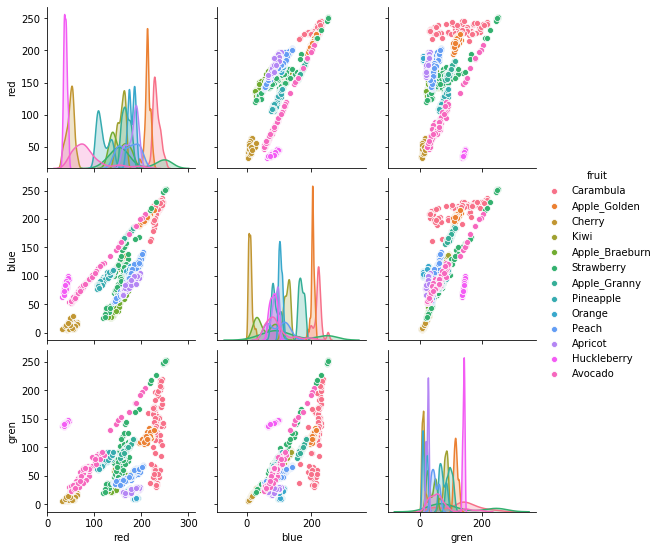

In [53]:
sns.pairplot(data=df, hue="fruit")
plt.show()

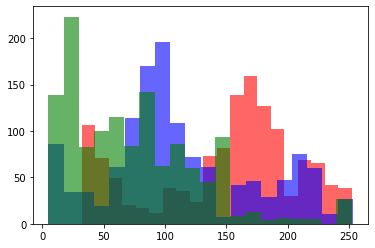

In [30]:
plt.hist(median_fruits[:,0], color="red", bins=20, alpha=0.6)
plt.hist(median_fruits[:,1], color="blue", bins=20, alpha=0.6)
plt.hist(median_fruits[:,2], color="green", bins=20, alpha=0.6)
plt.show()

In [57]:
len(name_fruits["name_new"].unique())

13

In [58]:
name_fruits = name_fruits["name_new"].to_list()

In [59]:
scaler = StandardScaler()
X = scaler.fit_transform(median_fruits)

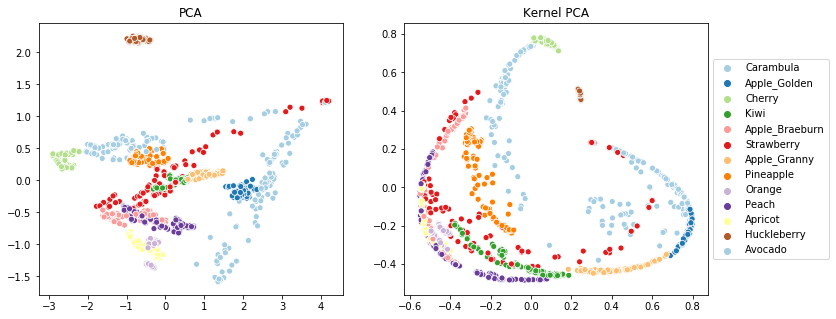

In [60]:
# PCA and Kernel PCA kernel Gaussino
np.random.seed(19970808)
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
pca = PCA(n_components=2)
pca_median_fruits = pca.fit_transform(X)

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.4)
kpca_median_fruits = kpca.fit_transform(X)

sns.scatterplot(ax=axs[0], x=pca_median_fruits[:, 0], y=pca_median_fruits[:, 1], 
                hue=name_fruits, legend=False,  palette="Paired")
axs[0].set(title="PCA")
sns.scatterplot(ax=axs[1], x=kpca_median_fruits[:, 0], y=kpca_median_fruits[:, 1], 
                hue=name_fruits,  palette="Paired")
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set(title="Kernel PCA")
plt.show()

### KMeans PCA

##### PCA and Kmeans

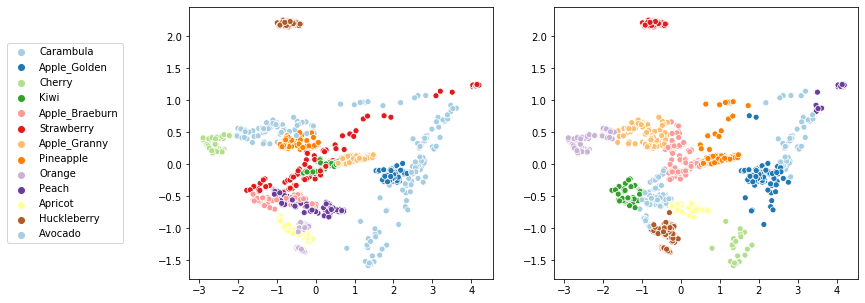

In [14]:
kmeans = KMeans(n_clusters=13)
y = kmeans.fit_predict(pca_median_fruits)
y = [str(i) for i in y]
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.scatterplot(ax=axs[0], x=pca_median_fruits[:, 0], y=pca_median_fruits[:, 1], 
                hue=name_fruits, palette="Paired")

sns.scatterplot(ax=axs[1], x=pca_median_fruits[:,0], y=pca_median_fruits[:,1], 
                hue=y, palette="Paired", legend=False)
axs[0].legend(loc='center right', bbox_to_anchor=(-0.2, 0.5))

plt.show()

#### Kernel PCA and Kmeans

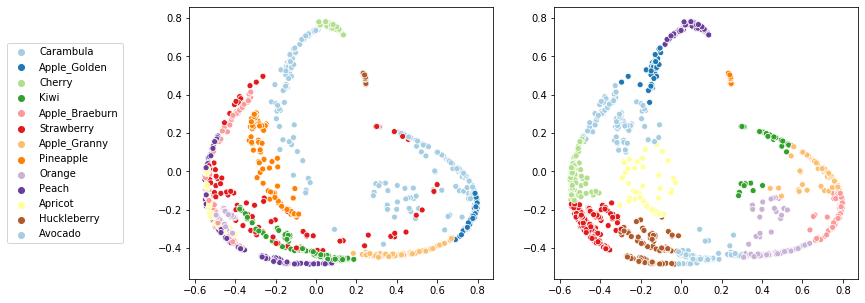

In [15]:
kmeans = KMeans(n_clusters=13)
y = kmeans.fit_predict(kpca_median_fruits)
y = [str(i) for i in y]
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.scatterplot(ax=axs[0], x=kpca_median_fruits[:, 0], y=kpca_median_fruits[:, 1], 
                hue=name_fruits, palette="Paired")

sns.scatterplot(ax=axs[1], x=kpca_median_fruits[:,0], y=kpca_median_fruits[:,1], 
                hue=y, palette="Paired", legend=False)
axs[0].legend(loc='center right', bbox_to_anchor=(-0.2, 0.5))

plt.show()

#### PCA and Kernel Kmenas

Converge in iterations 8


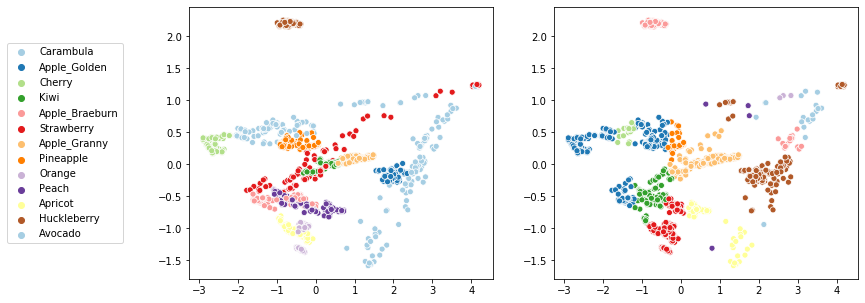

In [16]:
np.random.seed(19970808)
k = 13
pi_0 = np.random.randint(0, k, len(name_fruits))  # initialize the clusters
K_matrix = guassian_kernel(pca_median_fruits, 0.23)
pi_ajust = kernel_kmeans(pca_median_fruits, K_matrix, k, 0, 1000, pi_0)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.scatterplot(ax=axs[0], x=pca_median_fruits[:, 0], y=pca_median_fruits[:, 1], 
                    hue=name_fruits, palette="Paired")

sns.scatterplot(ax=axs[1], x=pca_median_fruits[:,0], y=pca_median_fruits[:,1], 
                    hue=pi_ajust, palette="Paired", legend=False)
axs[0].legend(loc='center right', bbox_to_anchor=(-0.2, 0.5))
plt.show()

0.1
Converge in iterations 9


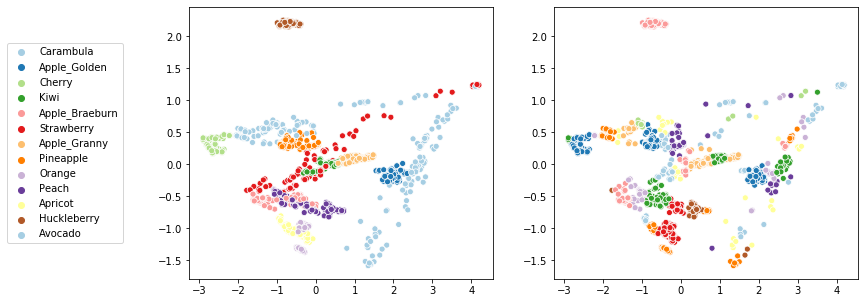

0.1105263157894737
Converge in iterations 7


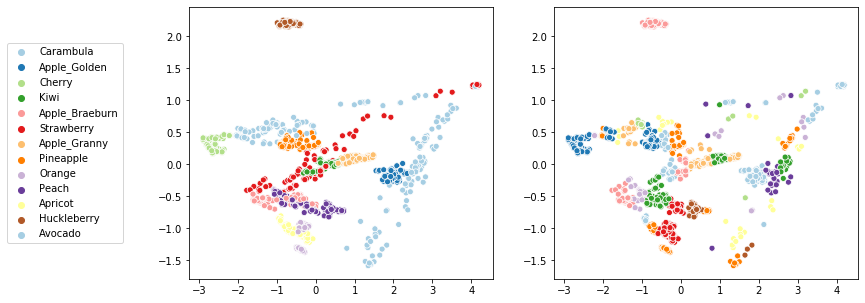

0.12105263157894737
Converge in iterations 8


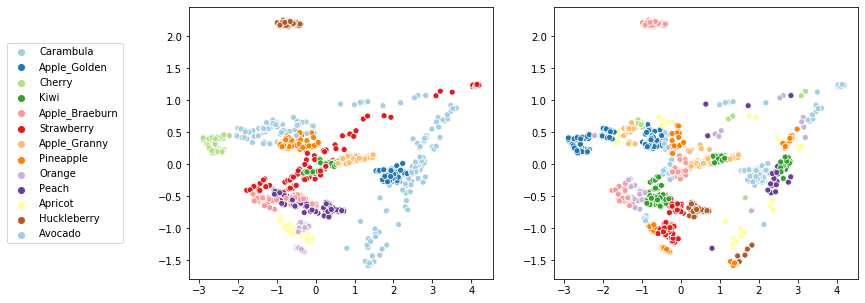

0.13157894736842107
Converge in iterations 7


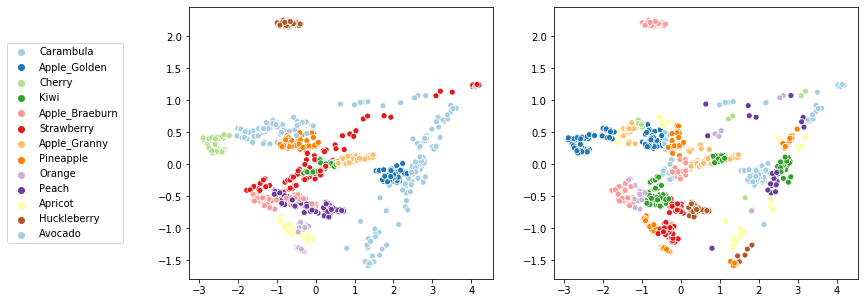

0.14210526315789473
Converge in iterations 8


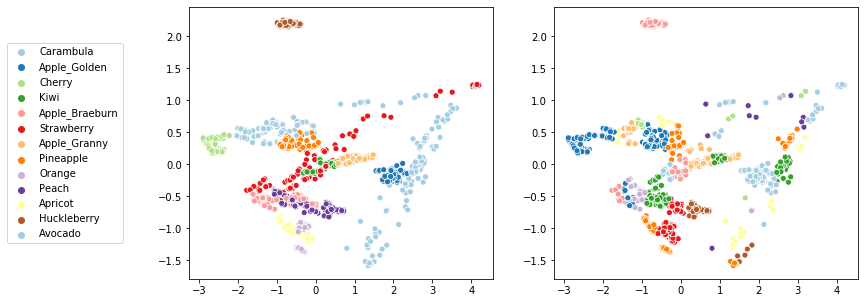

0.15263157894736842
Converge in iterations 9


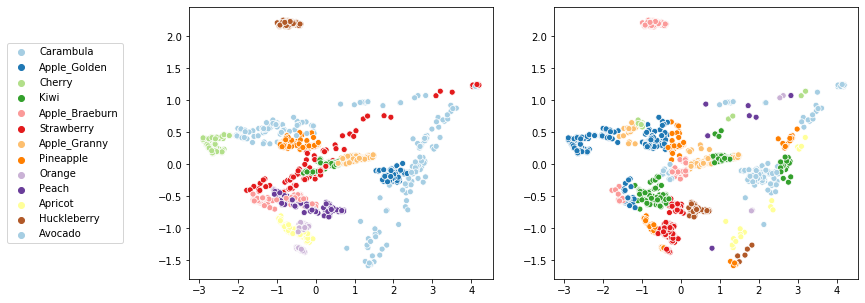

0.1631578947368421
Converge in iterations 9


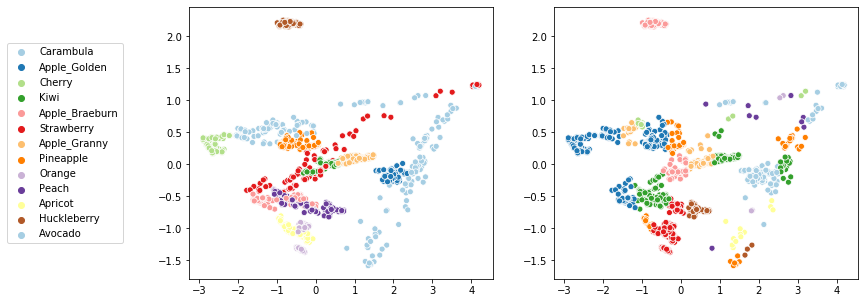

0.17368421052631577
Converge in iterations 9


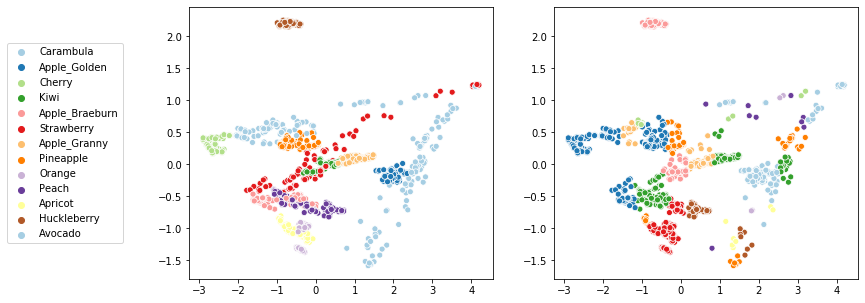

0.1842105263157895
Converge in iterations 9


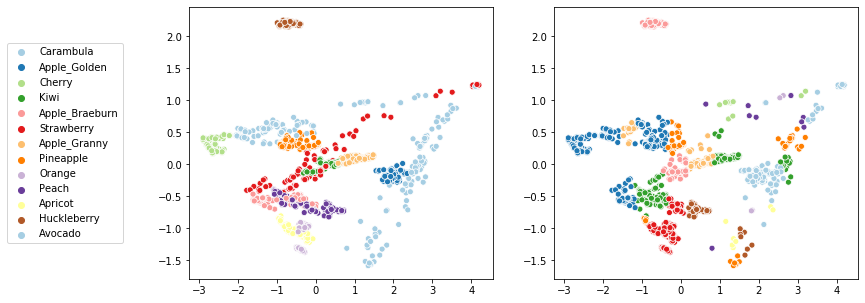

0.19473684210526315
Converge in iterations 10


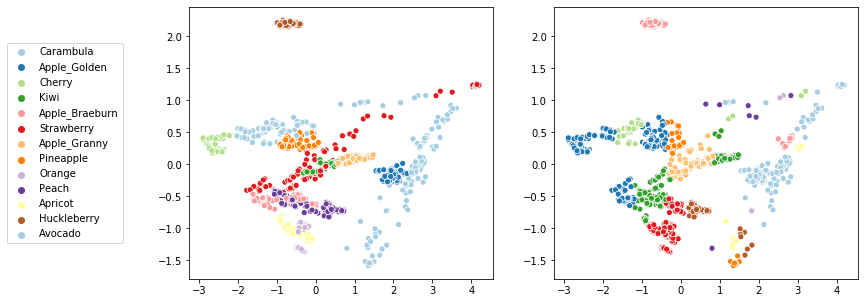

0.20526315789473684
Converge in iterations 10


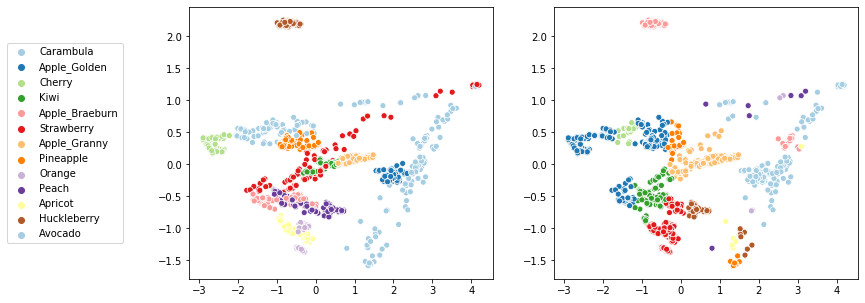

0.21578947368421053
Converge in iterations 9


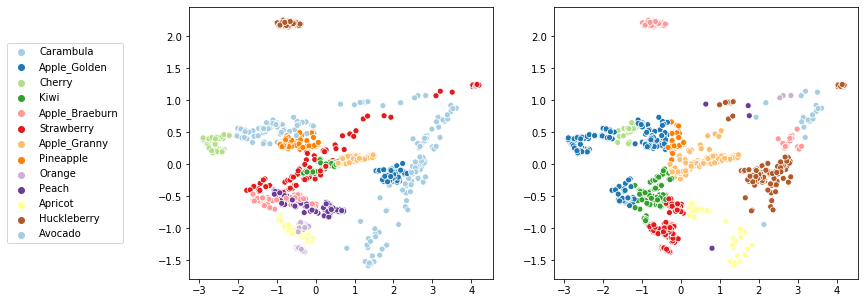

0.22631578947368422
Converge in iterations 8


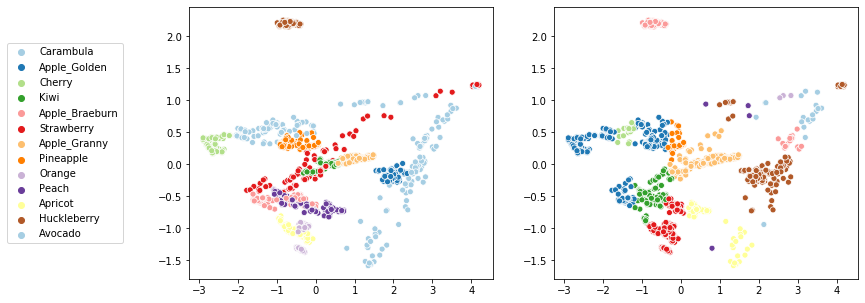

0.2368421052631579
Converge in iterations 9


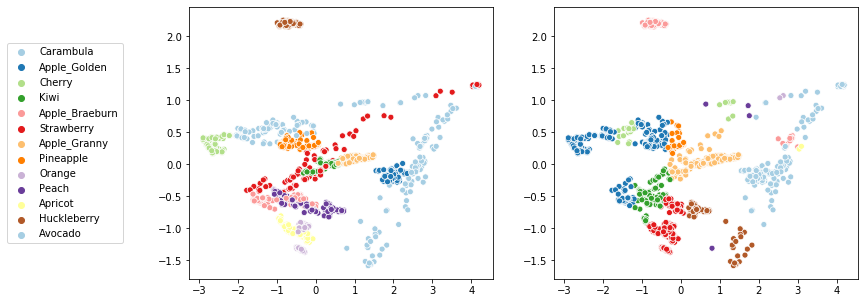

0.24736842105263157
Converge in iterations 12


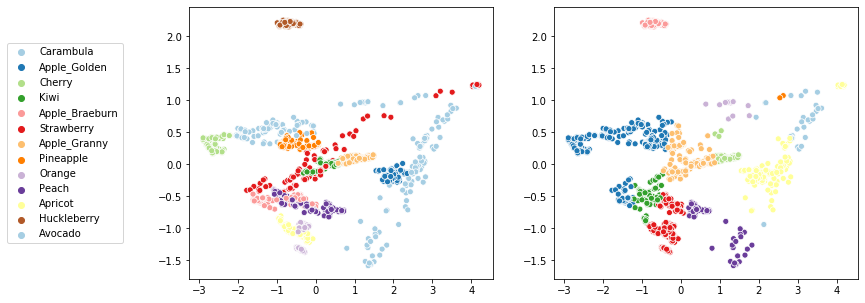

0.2578947368421053
Converge in iterations 11


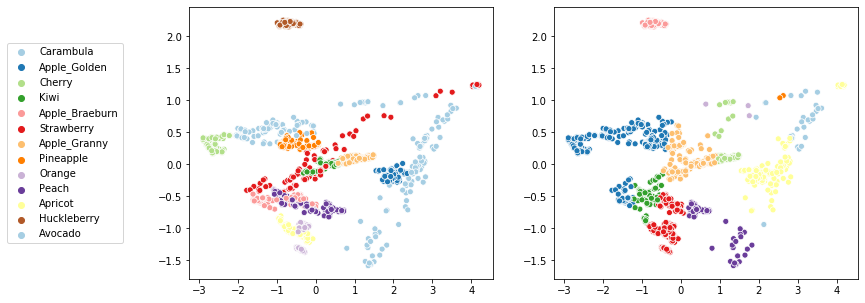

0.26842105263157895
Converge in iterations 10


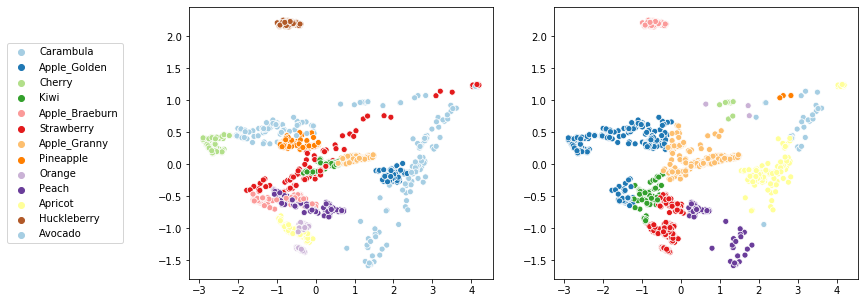

0.2789473684210526
Converge in iterations 10


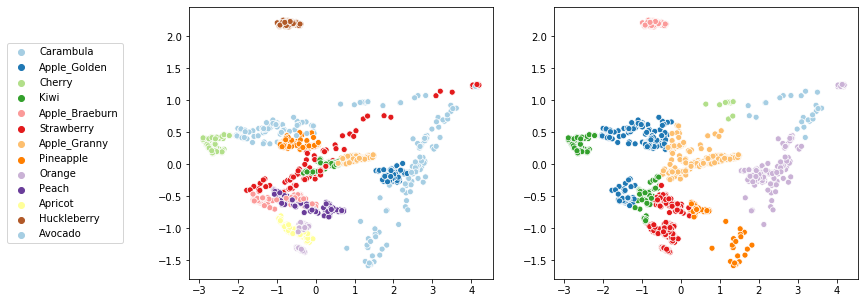

0.2894736842105263
Converge in iterations 10


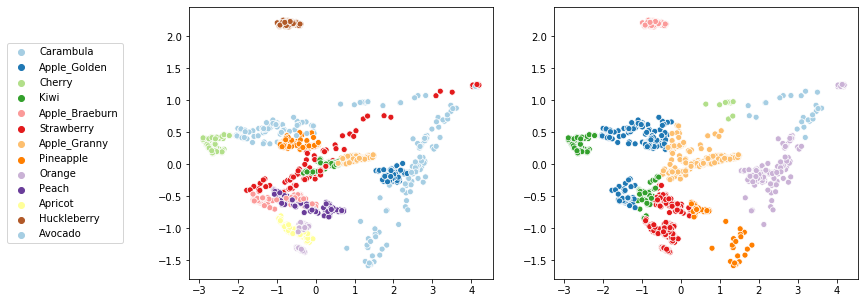

0.3
Converge in iterations 11


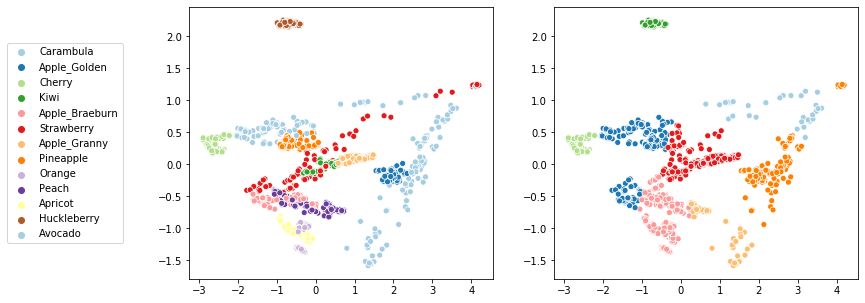

In [17]:
np.random.seed(19970808)
k = 13
pi_0 = np.random.randint(0, k, len(name_fruits))  # initialize the clusters
for i in np.linspace(0.1,.3,20):
    print(i)
    np.random.seed(19970808)
    #K_matrix = polynomial_kenerl(kpca_median_fruits, 0.4, 7)
    K_matrix = guassian_kernel(pca_median_fruits, i)
    pi_ajust = kernel_kmeans(pca_median_fruits, K_matrix, k, 0, 1000, pi_0)
    fig, axs = plt.subplots(ncols=2, figsize=(12,5))
    sns.scatterplot(ax=axs[0], x=pca_median_fruits[:, 0], y=pca_median_fruits[:, 1], 
                    hue=name_fruits, palette="Paired")

    sns.scatterplot(ax=axs[1], x=pca_median_fruits[:,0], y=pca_median_fruits[:,1], 
                    hue=pi_ajust, palette="Paired", legend=False)
    axs[0].legend(loc='center right', bbox_to_anchor=(-0.2, 0.5))

    plt.show()

Converge in iterations 7


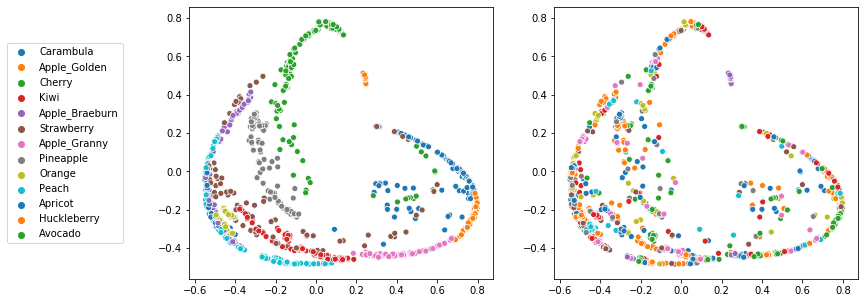

Converge in iterations 7


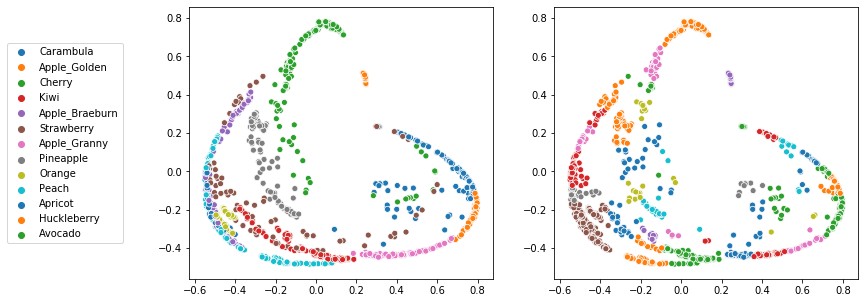

Converge in iterations 10


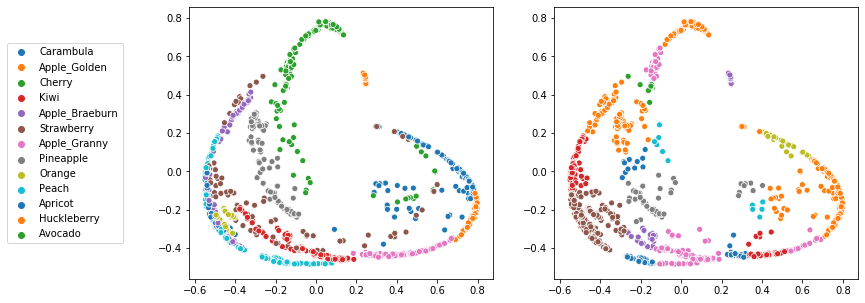

Converge in iterations 10


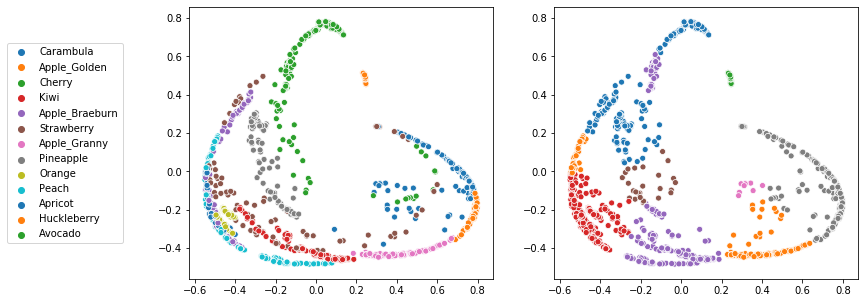

Converge in iterations 8


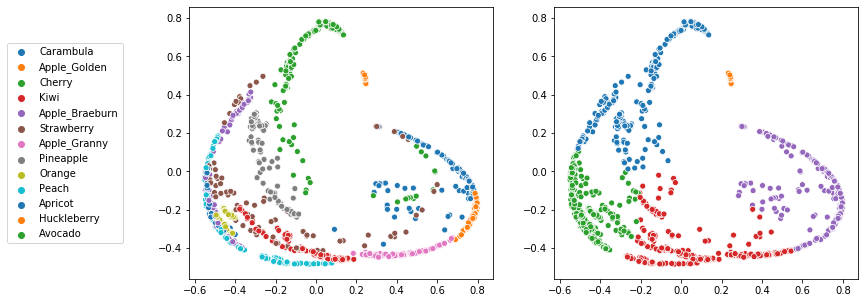

Converge in iterations 6


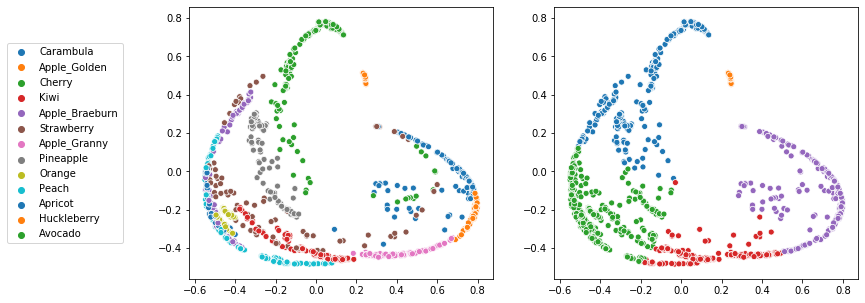

Converge in iterations 4


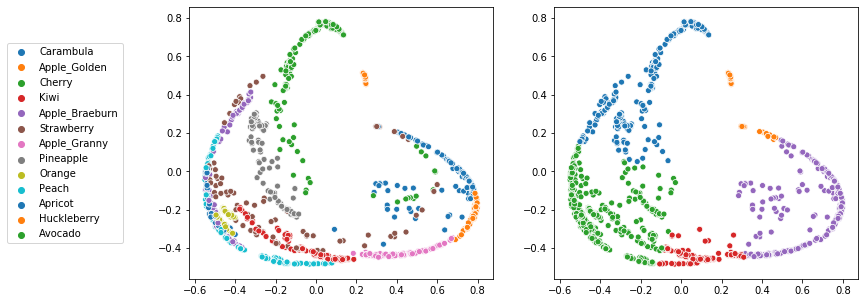

Converge in iterations 8


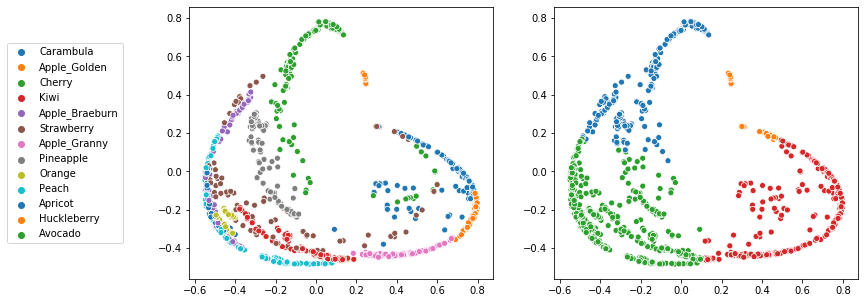

Converge in iterations 5


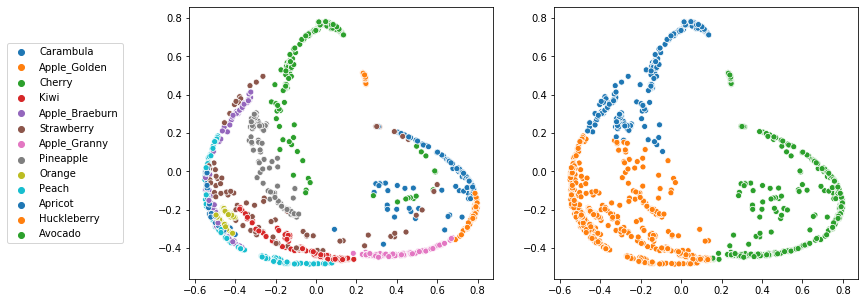

Converge in iterations 5


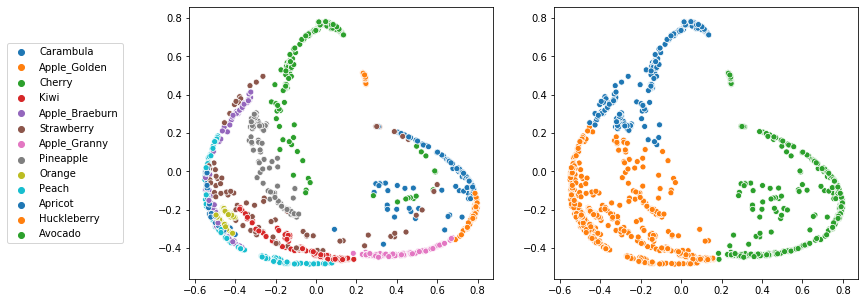

In [18]:
np.random.seed(19970808)
k = 13
pi_0 = np.random.randint(0, k, len(name_fruits))  # initialize the clusters
for i in np.linspace(0.01,.3,10):
    np.random.seed(19970808)
    #K_matrix = polynomial_kenerl(kpca_median_fruits, 0.4, 7)
    K_matrix = guassian_kernel(kpca_median_fruits, i)
    pi_ajust = kernel_kmeans(kpca_median_fruits, K_matrix, k, 0, 1000, pi_0)
    fig, axs = plt.subplots(ncols=2, figsize=(12,5))
    sns.scatterplot(ax=axs[0], x=kpca_median_fruits[:, 0], y=kpca_median_fruits[:, 1], 
                    hue=name_fruits, palette="tab10")

    sns.scatterplot(ax=axs[1], x=kpca_median_fruits[:,0], y=kpca_median_fruits[:,1], 
                    hue=pi_ajust, palette="tab10", legend=False)
    axs[0].legend(loc='center right', bbox_to_anchor=(-0.2, 0.5))
    plt.show()

### HSV

In [62]:
def quantiles_im(im):
    aux = np.zeros([1,9])
    h=0
    for i in range(2):
        for j in [0.25, 0.5, 0.75]:
            aux[0,h] = np.quantile(im[:,:,i], q=j)
            h +=1
    return aux

In [63]:
path_fruits = glob.glob("data_fruits_tarea/*.jpg")

quantile_fruits = np.zeros([1300, 9])
for i in range(len(path_fruits)):
    im = Image.open(path_fruits[i])
    im_hsv = color.rgb2hsv(im)
    quantile_fruits[i] = quantiles_im(im_hsv)

In [64]:
scaler = StandardScaler()
X = scaler.fit_transform(quantile_fruits)
# X = quantile_fruits

### PCA and Kernel PCA

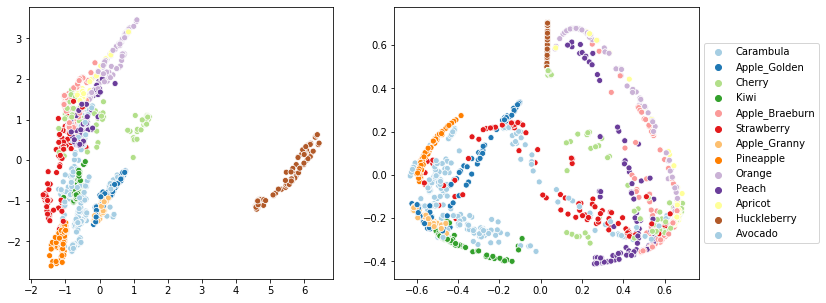

In [65]:
# PCA and Kernel PCA kernel Gaussino
np.random.seed(19970808)
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
pca = PCA(n_components=2)
pca_median_fruits = pca.fit_transform(X)

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.2333)
kpca_median_fruits = kpca.fit_transform(X)

sns.scatterplot(ax=axs[0], x=pca_median_fruits[:, 0], y=pca_median_fruits[:, 1], 
                hue=name_fruits, legend=False,  palette="Paired")
sns.scatterplot(ax=axs[1], x=kpca_median_fruits[:, 0], y=kpca_median_fruits[:, 1], 
                hue=name_fruits,  palette="Paired")
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### KMEANS PCA 

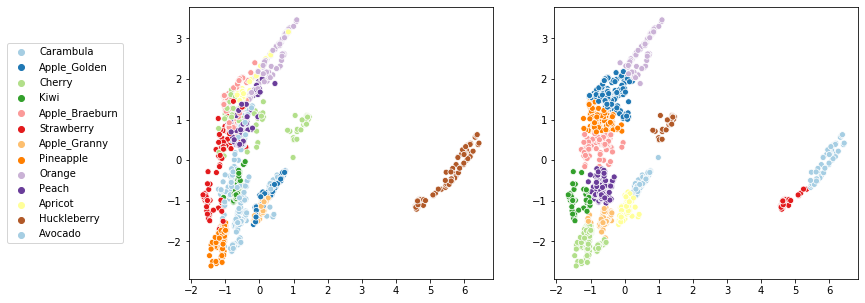

In [66]:
kmeans = KMeans(n_clusters=13)
y = kmeans.fit_predict(pca_median_fruits)
y = [str(i) for i in y]
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.scatterplot(ax=axs[0], x=pca_median_fruits[:, 0], y=pca_median_fruits[:, 1], 
                hue=name_fruits, palette="Paired")

sns.scatterplot(ax=axs[1], x=pca_median_fruits[:,0], y=pca_median_fruits[:,1], 
                hue=y, palette="Paired", legend=False)
axs[0].legend(loc='center right', bbox_to_anchor=(-0.2, 0.5))

plt.show()

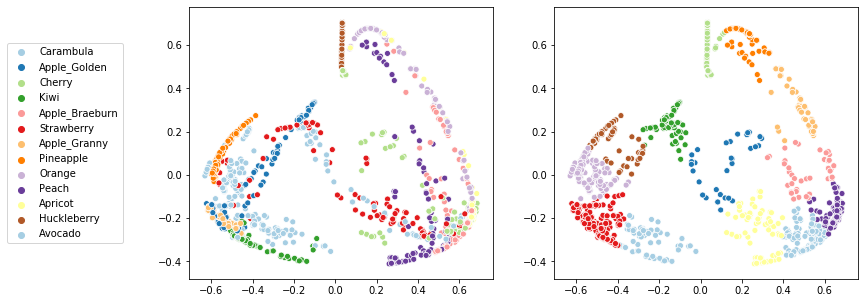

In [24]:
kmeans = KMeans(n_clusters=13)
y = kmeans.fit_predict(kpca_median_fruits)
y = [str(i) for i in y]
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.scatterplot(ax=axs[0], x=kpca_median_fruits[:, 0], y=kpca_median_fruits[:, 1], 
                hue=name_fruits, palette="Paired")

sns.scatterplot(ax=axs[1], x=kpca_median_fruits[:,0], y=kpca_median_fruits[:,1], 
                hue=y, palette="Paired", legend=False)
axs[0].legend(loc='center right', bbox_to_anchor=(-0.2, 0.5))

plt.show()

### PCA and Kerne K Mean

Converge in iterations 13


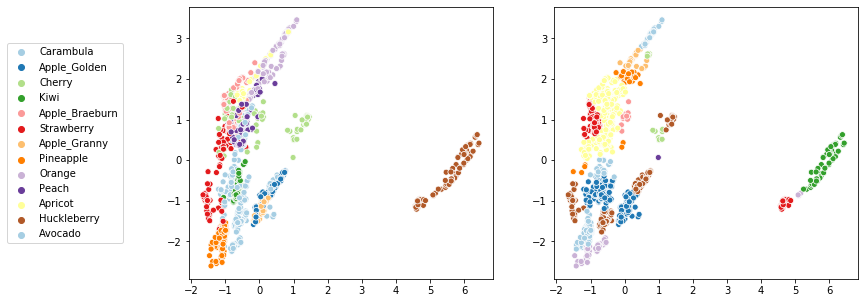

In [70]:
np.random.seed(19970808)
k = 13
pi_0 = np.random.randint(0, k, len(name_fruits))  # initialize the clusters
K_matrix = guassian_kernel(pca_median_fruits, 0.19)
pi_ajust = kernel_kmeans(pca_median_fruits, K_matrix, k, 0, 1000, pi_0)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.scatterplot(ax=axs[0], x=pca_median_fruits[:, 0], y=pca_median_fruits[:, 1], 
                    hue=name_fruits, palette="Paired")

sns.scatterplot(ax=axs[1], x=pca_median_fruits[:,0], y=pca_median_fruits[:,1], 
                    hue=pi_ajust, palette="Paired", legend=False)
axs[0].legend(loc='center right', bbox_to_anchor=(-0.2, 0.5))
plt.show()

Converge in iterations 6


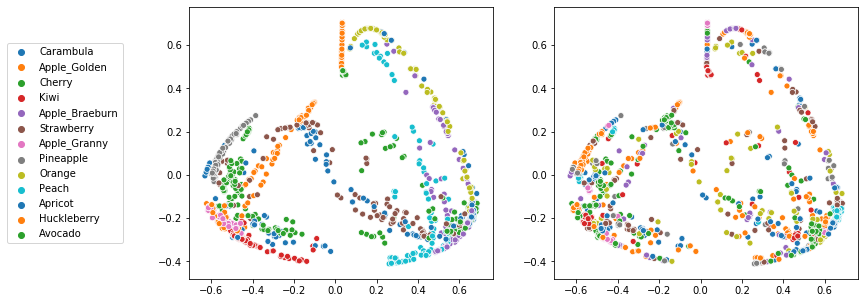

Converge in iterations 12


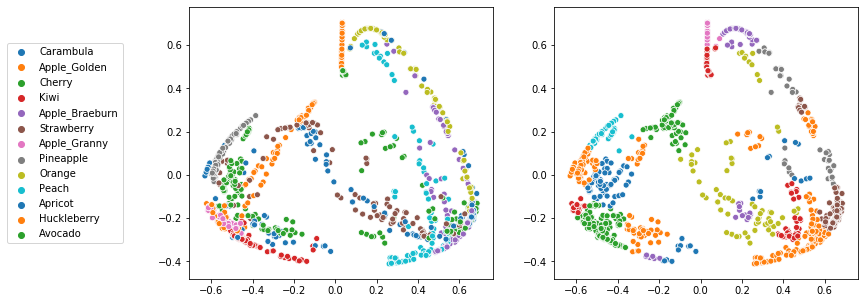

Converge in iterations 11


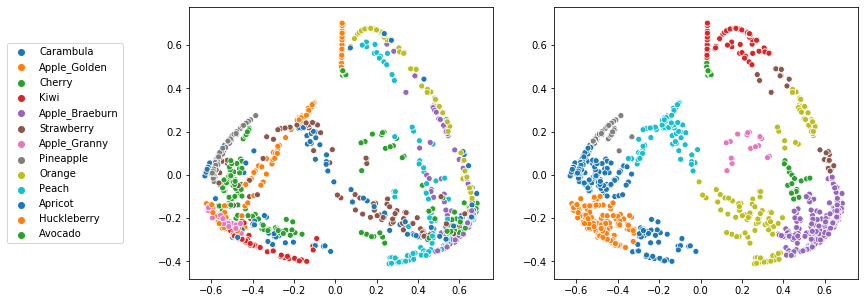

Converge in iterations 8


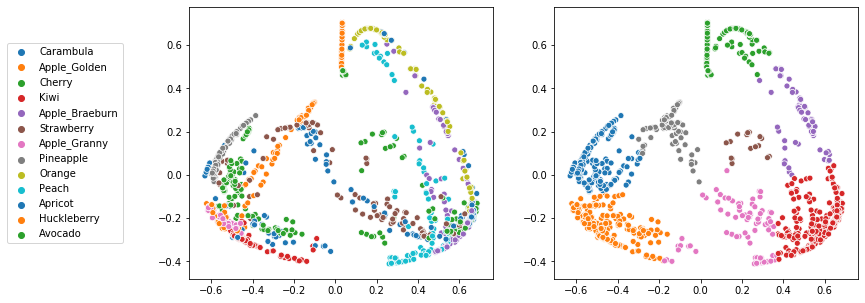

Converge in iterations 6


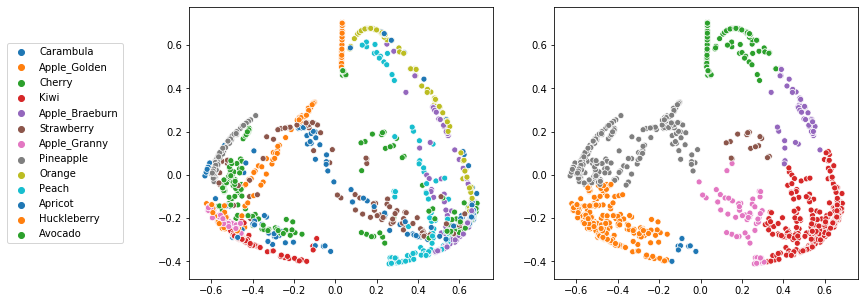

Converge in iterations 14


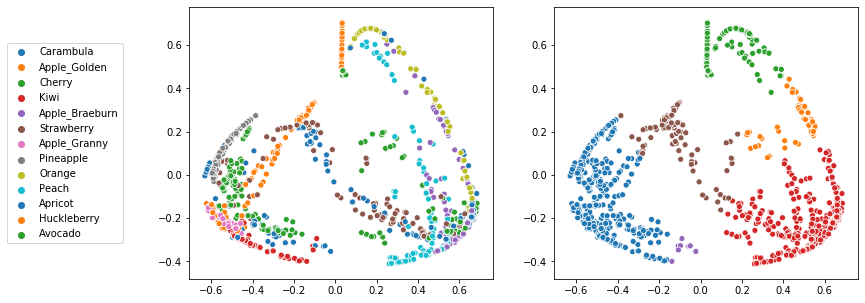

Converge in iterations 11


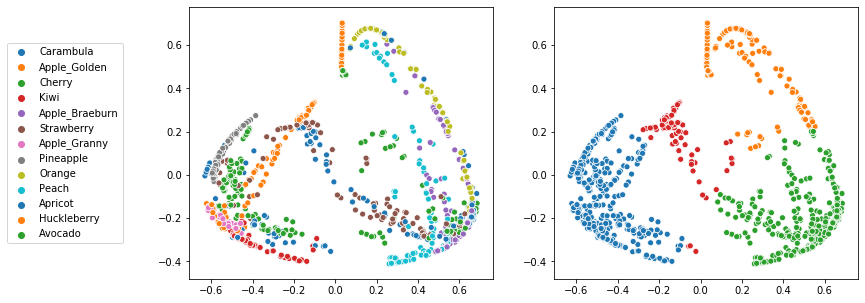

Converge in iterations 10


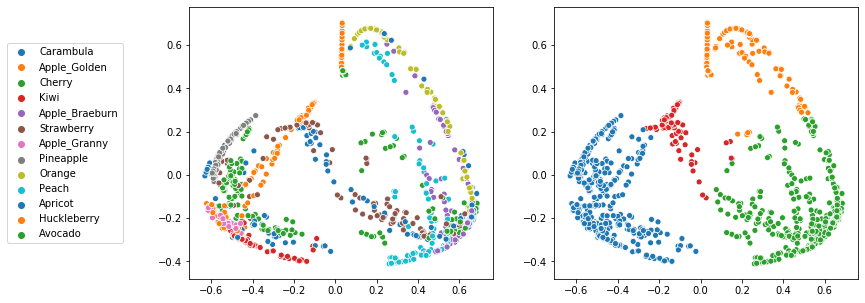

Converge in iterations 5


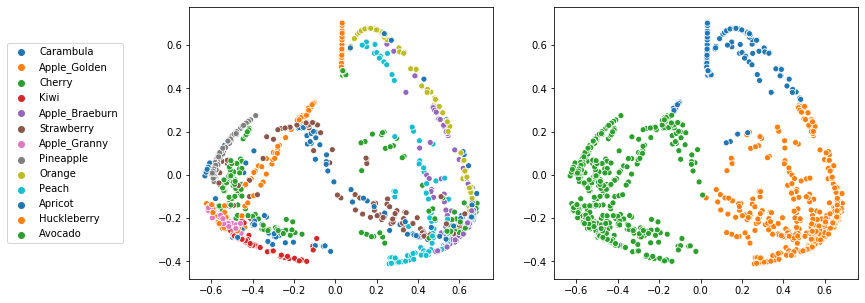

Converge in iterations 4


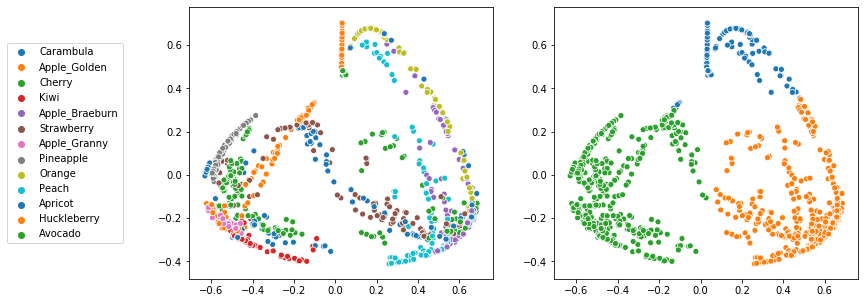

In [26]:
np.random.seed(19970808)
k = 13
pi_0 = np.random.randint(0, k, len(name_fruits))  # initialize the clusters
for i in np.linspace(0.01,.3,10):
    np.random.seed(19970808)
    #K_matrix = polynomial_kenerl(kpca_median_fruits, 0.4, 7)
    K_matrix = guassian_kernel(kpca_median_fruits, i)
    pi_ajust = kernel_kmeans(kpca_median_fruits, K_matrix, k, 0, 1000, pi_0)
    fig, axs = plt.subplots(ncols=2, figsize=(12,5))
    sns.scatterplot(ax=axs[0], x=kpca_median_fruits[:, 0], y=kpca_median_fruits[:, 1], 
                    hue=name_fruits, palette="tab10")

    sns.scatterplot(ax=axs[1], x=kpca_median_fruits[:,0], y=kpca_median_fruits[:,1], 
                    hue=pi_ajust, palette="tab10", legend=False)
    axs[0].legend(loc='center right', bbox_to_anchor=(-0.2, 0.5))
    plt.show()